Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [37]:
# importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for model building

from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [2]:
avacado = pd.read_csv("Avocado.csv",date_parser="Date")
avacado.drop(columns='Unnamed: 0',inplace=True)
avacado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avacado.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
avacado.drop(columns="Date",inplace=True)

In [5]:
avacado.shape

(18249, 12)

In [6]:
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Date, type, region are the object data to be converted and no null values present in dataset

# EDA

In [7]:
avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
avacado.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

**replacing the names to avoid confusion**

In [9]:
avacado.rename(columns={"4046" : "PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)
avacado.columns

Index(['AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

### we can also drop total volume and total bags as its a repetative feature

In [10]:
avacado.drop(columns=['Total Volume','Total Bags'],inplace=True)

# Vizualisation

**searching for the outliers**

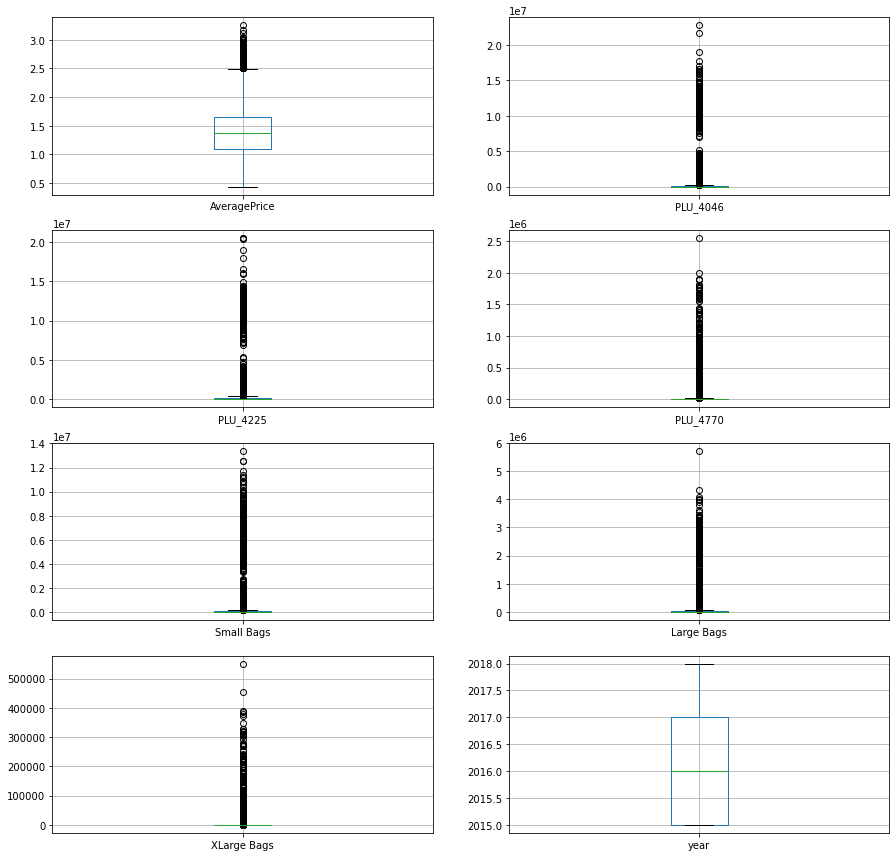

In [11]:
plt.figure(figsize=[15,15])
rows = 4
cols = len(avacado.columns)//rows
j=0
for i in avacado.columns:
    if (avacado[i].dtype != object):
        j+=1
        plt.subplot(rows,cols,j)
        avacado.boxplot(i)
plt.show()

**there are outliers in the data but can be ignored**

**plotting to find price dependency on the region**

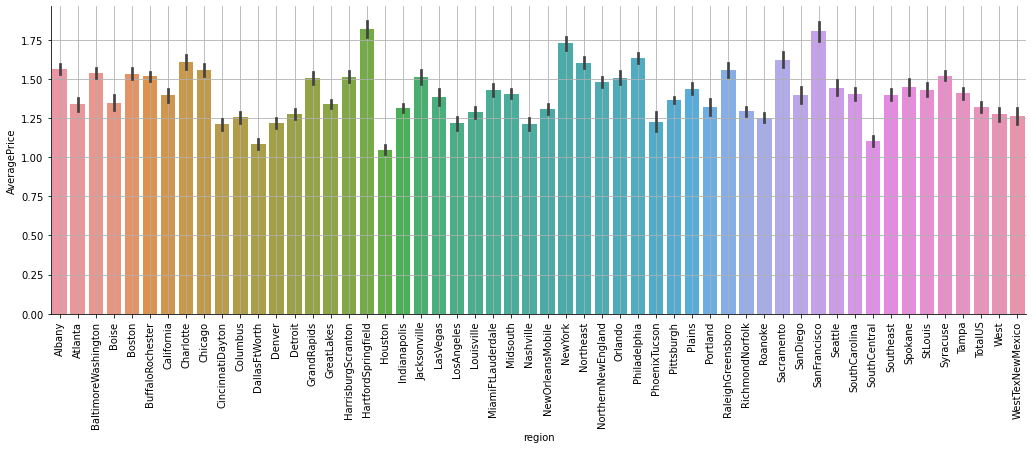

In [12]:
price_region =sns.catplot(x="region",y="AveragePrice",data=avacado,kind="bar",aspect=3)
price_region.set_xticklabels(rotation=90)
plt.grid();

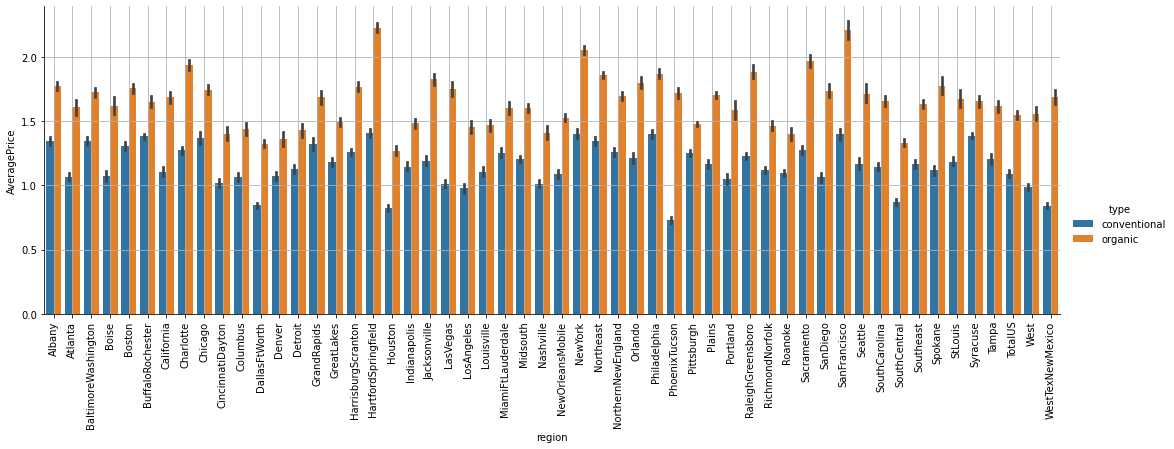

In [13]:
price_region =sns.catplot(x="region",y="AveragePrice",data=avacado,kind="bar",hue="type",aspect=3)
price_region.set_xticklabels(rotation=90)
plt.grid();

**from the above bar plot we can see that there is price dependency w.r.t region, average price of avacado is less in houston**

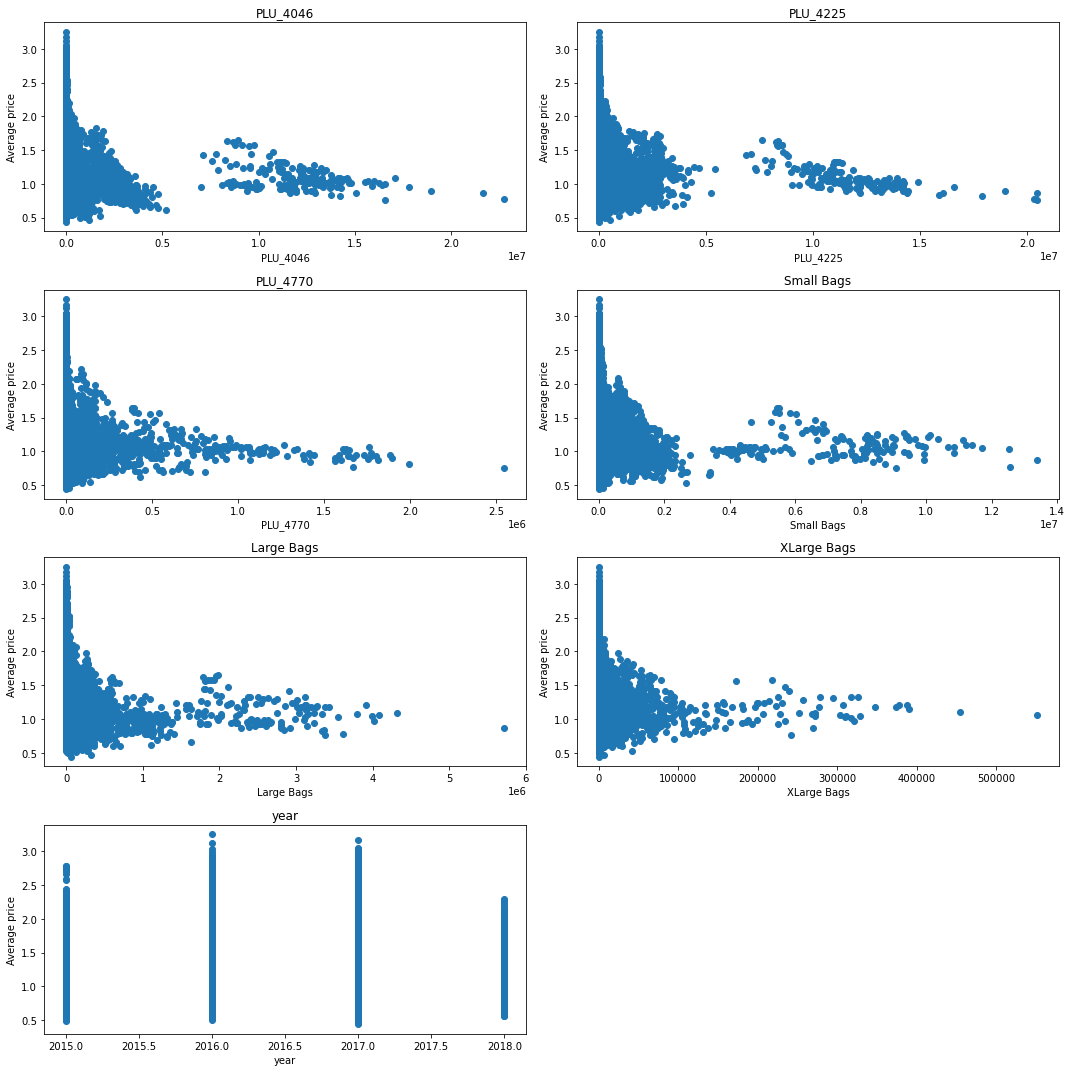

In [14]:
plt.figure(figsize=[15,15])
rows = 4
cols = len(avacado.columns)//rows
j=0
for i in avacado.columns:
    if (avacado[i].dtype != object and i != "AveragePrice"):
        j+=1
        plt.subplot(rows,cols,j)
        plt.scatter(x=avacado[i],y=avacado.AveragePrice)
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Average price")
plt.tight_layout()
plt.show()

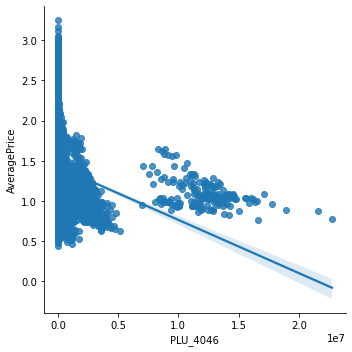

In [15]:
sns.lmplot(data=avacado,x="PLU_4046",y="AveragePrice")

### Heat map

<AxesSubplot:>

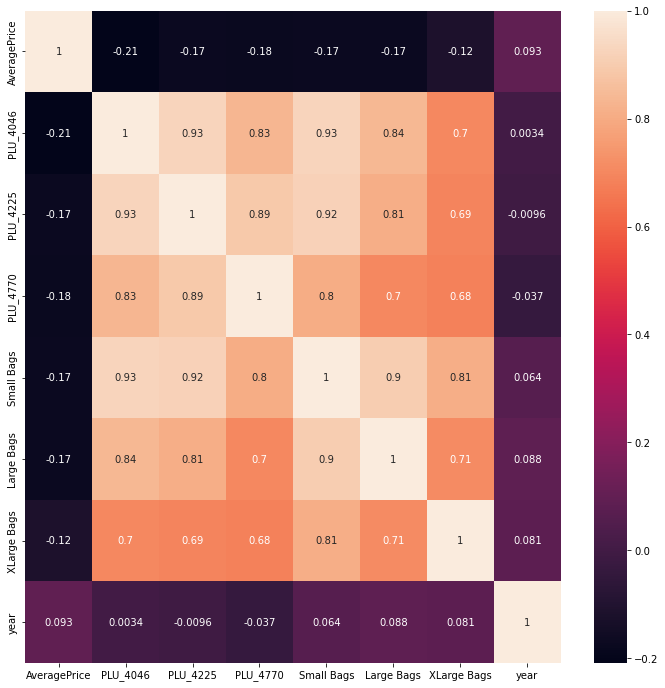

In [16]:
plt.figure(figsize=[12,12])
sns.heatmap(data=avacado.corr(),annot=True)

**from heatmap we can see there is a good correlation between variables**

### checking for unique values for feature engineering

In [17]:
avacado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [18]:
avacado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
avacado.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

## Feature engineering

**Label encoding the features**

In [20]:
lb = LabelEncoder()
avacado.type = lb.fit_transform(avacado.type)
avacado

,AveragePrice,PLU_4046,PLU_4225,PLU_4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,Albany
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,Albany
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,Albany
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,Albany
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,WestTexNewMexico


**Data we can see that conventional = 0, organic = 1**

**One-hot encoding**

In [21]:
avacado_dummy = pd.get_dummies(avacado,columns=["year","region"])
avacado_dummy.head()

,AveragePrice,PLU_4046,PLU_4225,PLU_4770,Small Bags,Large Bags,XLarge Bags,type,year_2015,year_2016,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## seperating independent features

In [22]:
X = avacado_dummy.drop(columns="AveragePrice")

y = avacado_dummy.AveragePrice

print(X.head(),"\n\n", y.head())

   PLU_4046   PLU_4225  PLU_4770  Small Bags  Large Bags  XLarge Bags  type  \
0   1036.74   54454.85     48.16     8603.62       93.25          0.0     0   
1    674.28   44638.81     58.33     9408.07       97.49          0.0     0   
2    794.70  109149.67    130.50     8042.21      103.14          0.0     0   
3   1132.00   71976.41     72.58     5677.40      133.76          0.0     0   
4    941.48   43838.39     75.78     5986.26      197.69          0.0     0   

   year_2015  year_2016  year_2017  ...  region_SouthCarolina  \
0          1          0          0  ...                     0   
1          1          0          0  ...                     0   
2          1          0          0  ...                     0   
3          1          0          0  ...                     0   
4          1          0          0  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0                 0               0  

## spliting the data

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

print("Shape of the data \n shape X_train: ",X_train.shape,"shape X_test:",X_test.shape)

Shape of the data 
 shape X_train:  (13686, 65) shape X_test: (4563, 65)


## feature Normalization

In [24]:
sc = StandardScaler()

X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

## iterating through different Polynomial features to find the optimum


after iterating through different polynomial degree, found out RMSE for deg of 2 is seen to be optimum

# Model creation

creating polynomial features

In [27]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train_norm)
X_test_poly = poly.transform(X_test_norm)


**creating model**

In [28]:
reg_model = LinearRegression()

reg_model.fit(X_train_poly,y_train)

LinearRegression()

In [32]:
#coeficient of X

coeficient = reg_model.coef_

print("Coeficient of X: ",coeficient)

Coeficient of X:  [ 1.88355985e+05 -4.61274785e+00 -1.85984076e+00 ...  1.16847677e+07
  8.56134344e+06  1.39469108e+07]


In [33]:
# intercept of y

inter = reg_model.intercept_

print("intercept of Y : ",inter)

intercept of Y :  -218530877.887924


Predicting with the unseen values

In [29]:
pred_y = reg_model.predict(X_test_poly)

print(f"\n predicted value: \n {pred_y} \n true y:\n {y_test}")


 predicted value: 
 [0.81811318 1.04515421 1.46244115 ... 1.65629515 1.33092552 1.57365111] 
 true y:
 8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
         ... 
3763     0.90
79       0.99
13798    1.68
4506     1.21
10399    1.88
Name: AveragePrice, Length: 4563, dtype: float64


# Evaluating the model

In [34]:
# R square error (model score)

R2error = reg_model.score(X_test_poly,y_test)

print("R square error (model score): ", R2error)


R square error (model score):  0.726589037400627


In [35]:
# Root mean square error

RMSE = mean_squared_error(y_test,pred_y,squared=False)

print("Root mean square error of the model: ",RMSE)

Root mean square error of the model:  0.21000208579398466


In [36]:
# mean Square error

MSE = mean_squared_error(y_test,pred_y)

print("Mean square error of the model: ",MSE)

Mean square error of the model:  0.044100876037824095


In [38]:
# Mean Absolute error

MAE = mean_absolute_error(y_test,pred_y)

print("Mean absolute error of the model: ",MAE)

Mean absolute error of the model:  0.14752837790853485
